In [1]:
# %% Check for missing values in pairs data
print("Checking for missing values in pairs data...")
print("\nMissing values per column:")
print(df_pairs.isnull().sum())

print("\n% Missing:")
missing_pct = (df_pairs.isnull().sum() / len(df_pairs) * 100).round(2)
print(missing_pct[missing_pct > 0])

# Fill missing values in pairs data if any
numeric_cols = df_pairs.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_pairs[col].isnull().any():
        median_val = df_pairs[col].median()
        if np.isnan(median_val):
            median_val = 0.0
        df_pairs[col] = df_pairs[col].fillna(median_val)
        print(f"  Filled {col} with median: {median_val:.2f}")

print("\n✓ Missing values handled")

Checking for missing values in pairs data...

Missing values per column:


NameError: name 'df_pairs' is not defined

Loading labeled pairs...
✓ Loaded 22,302 pairs

Data shape: (22302, 15)
Columns: ['student_i', 'student_j', 'complementarity_score', 'score_i', 'engagement_i', 'clicks_i', 'slope_i', 'score_j', 'engagement_j', 'clicks_j', 'slope_j', 'score_diff', 'engagement_diff', 'is_good_pair', 'score_bucket']

Class distribution:
is_good_pair
0    16726
1     5576
Name: count, dtype: int64
Splitting data...
  Train: 15,610 pairs (25.00% positive)
  Val:   2,231 pairs (25.01% positive)
  Test:  4,461 pairs (24.99% positive)


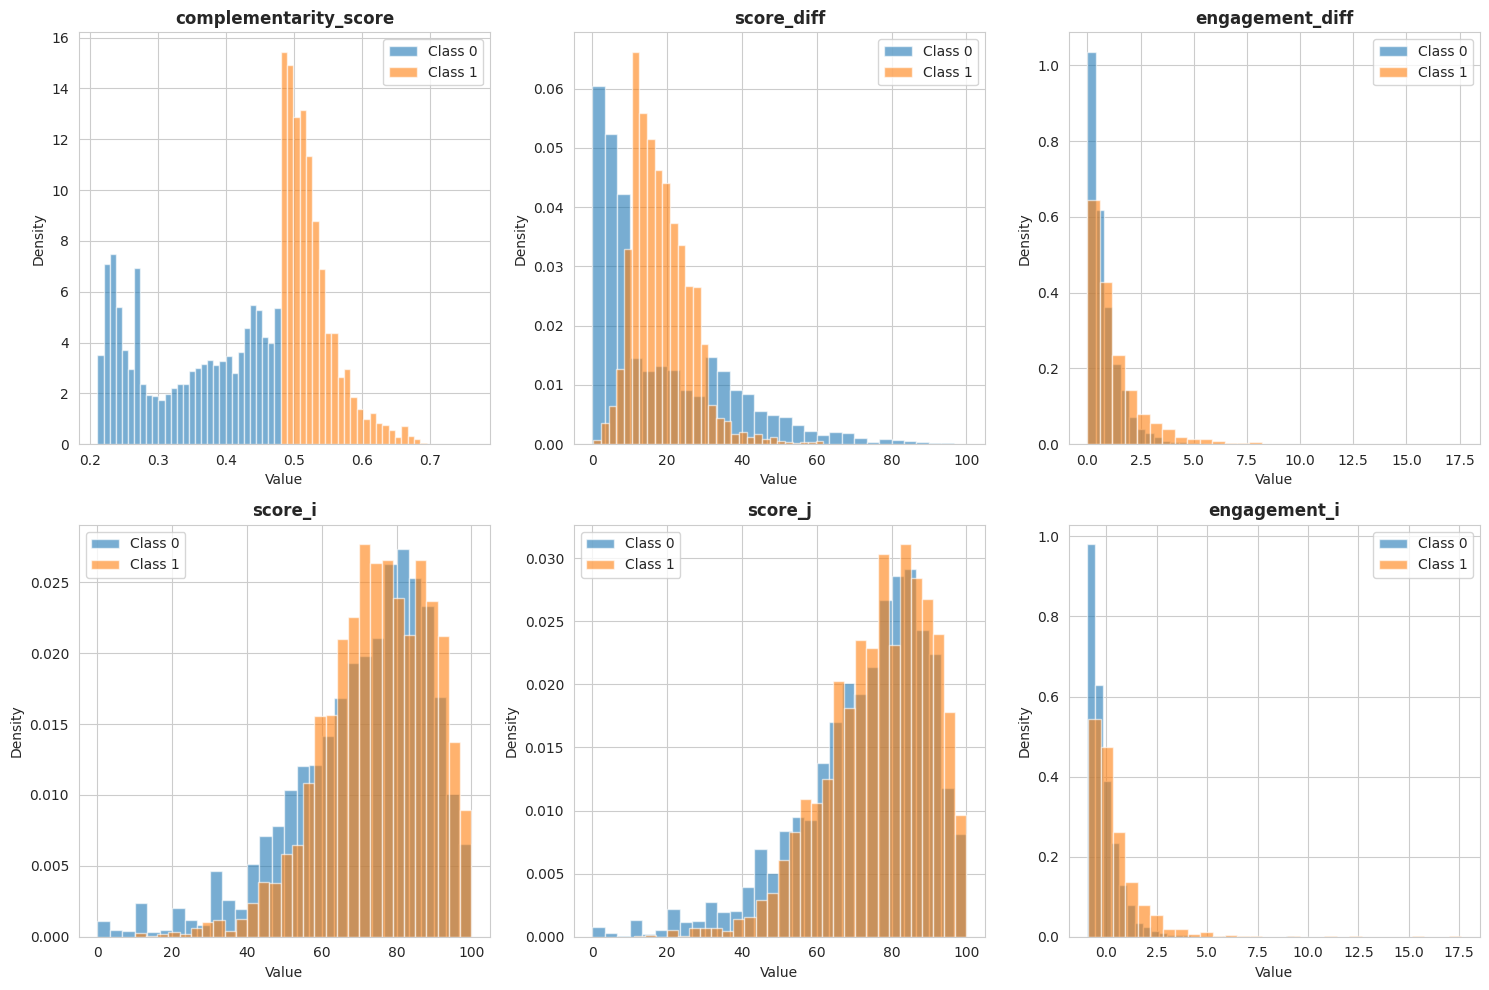


BASELINE 1: HEURISTIC RANKER

Training HEURISTIC model

Feature matrix shape: (15610, 13)
Features: ['score_i', 'engagement_i', 'clicks_i', 'slope_i', 'score_j', 'engagement_j', 'clicks_j', 'slope_j', 'score_diff', 'engagement_diff', 'score_product', 'engagement_product', 'complementarity_score']

Training...
✓ Training complete


Evaluating on train set...

HEURISTIC - TRAIN Evaluation Results

Classification Metrics:
  Accuracy:  0.7500
  Precision: 0.5001
  Recall:    1.0000
  F1 Score:  0.6667
  AUC-ROC:   1.0000

Ranking Metrics:
K     P@K        R@K        NDCG@K    
----------------------------------------
1     1.0000     0.0003     1.0000    
3     1.0000     0.0008     1.0000    
5     1.0000     0.0013     1.0000    
10    1.0000     0.0026     1.0000    

  MAP: 1.0000
  MRR: 1.0000


Evaluating on val set...

HEURISTIC - VAL Evaluation Results

Classification Metrics:
  Accuracy:  0.7499
  Precision: 0.5000
  Recall:    1.0000
  F1 Score:  0.6667
  AUC-ROC:   1.0000

Rank

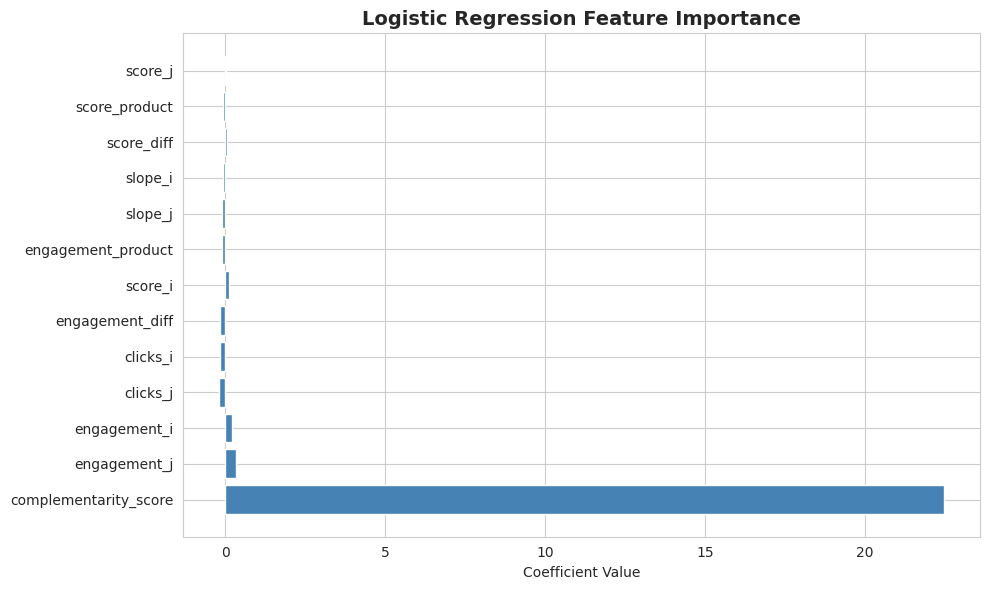


BASELINE 3: RANDOM FOREST

Training RANDOM_FOREST model

Feature matrix shape: (15610, 13)
Features: ['score_i', 'engagement_i', 'clicks_i', 'slope_i', 'score_j', 'engagement_j', 'clicks_j', 'slope_j', 'score_diff', 'engagement_diff', 'score_product', 'engagement_product', 'complementarity_score']

Training...
✓ Training complete


Evaluating on train set...

RANDOM_FOREST - TRAIN Evaluation Results

Classification Metrics:
  Accuracy:  0.7500
  Precision: 0.5001
  Recall:    1.0000
  F1 Score:  0.6667
  AUC-ROC:   1.0000

Ranking Metrics:
K     P@K        R@K        NDCG@K    
----------------------------------------
1     1.0000     0.0003     1.0000    
3     1.0000     0.0008     1.0000    
5     1.0000     0.0013     1.0000    
10    1.0000     0.0026     1.0000    

  MAP: 1.0000
  MRR: 1.0000


Evaluating on val set...

RANDOM_FOREST - VAL Evaluation Results

Classification Metrics:
  Accuracy:  0.7499
  Precision: 0.5000
  Recall:    1.0000
  F1 Score:  0.6667
  AUC-ROC:   1.0

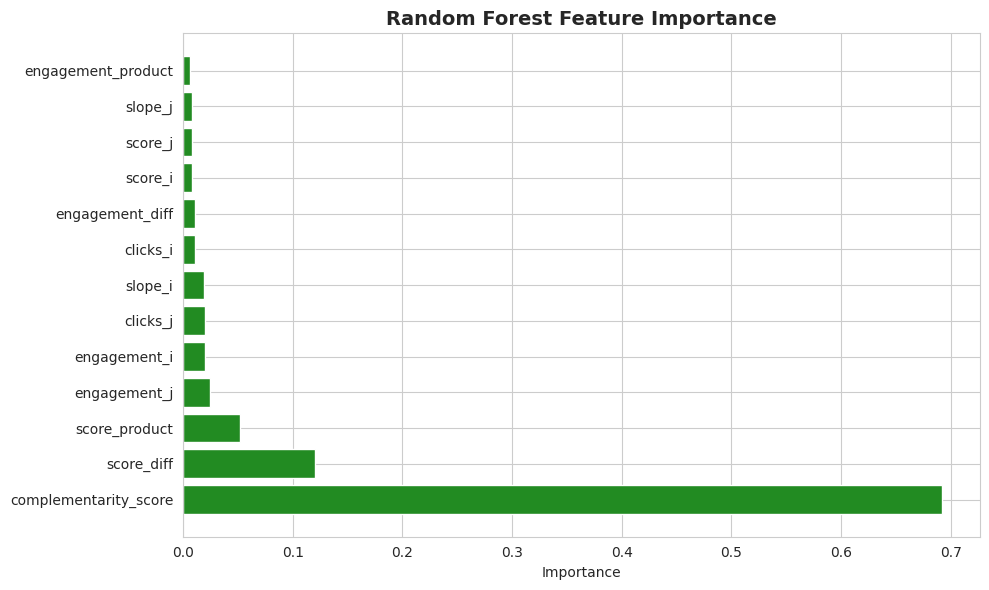


MODEL COMPARISON

Model Comparison

              model  precision@3  ndcg@5      map  auc_roc
   Heuristic Ranker          1.0     1.0 1.000000 1.000000
Logistic Regression          1.0     1.0 0.999896 0.999964
      Random Forest          1.0     1.0 1.000000 1.000000

✓ Saved results to ../results/baseline_comparison.csv


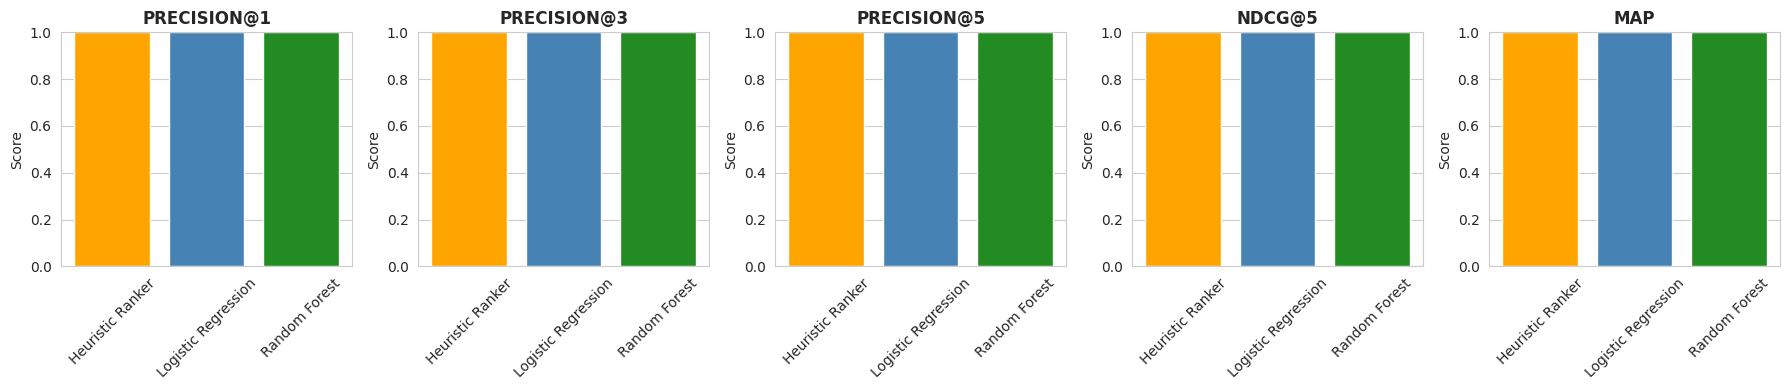


PREDICTION ANALYSIS

Top 10 predicted pairs:
       student_i  student_j  predicted_score  complementarity_score  \
1429      601082     644974         0.999862               0.541900   
3104      586808     680145         0.999695               0.561022   
1006      629342     631772         0.999693               0.632772   
11181     686018    1864086         0.999677               0.521810   
3388      187100     958987         0.999670               0.590409   
6750      632506     648363         0.999662               0.582560   
1846      537811     636996         0.999662               0.661195   
586       576251     628034         0.999615               0.602989   
6516       80868     245217         0.999591               0.620000   
14359     502004     691926         0.999571               0.533087   

       is_good_pair  
1429              1  
3104              1  
1006              1  
11181             1  
3388              1  
6750              1  
1846              

/tmp/ipykernel_202351/1152947640.py:274: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = test_results.groupby('score_bin')['is_good_pair'].agg(['mean', 'count'])


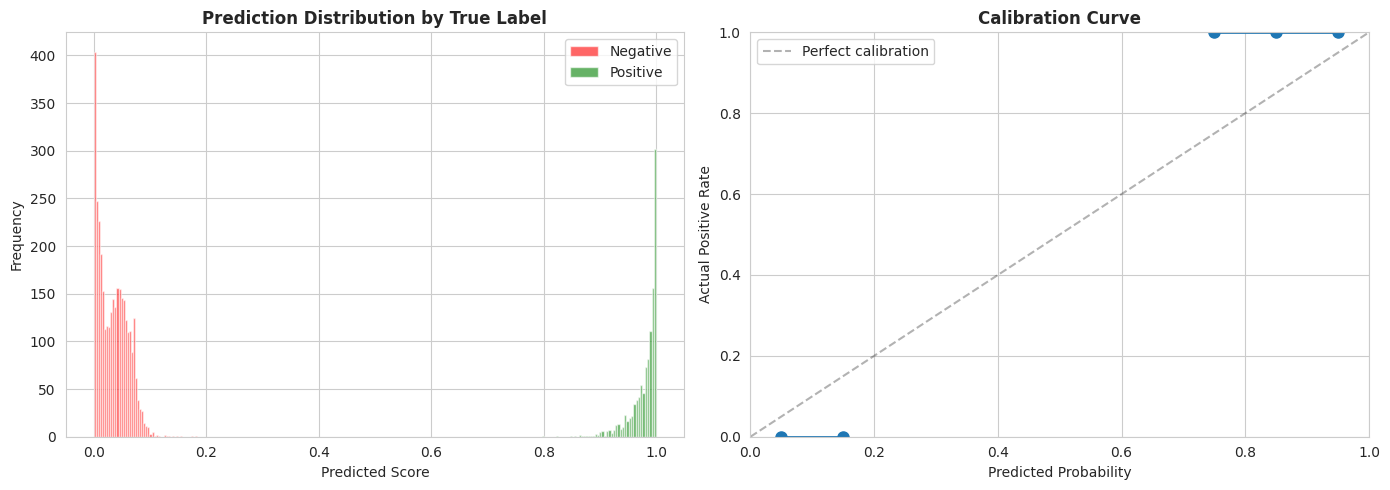


BASELINE MODELS SUMMARY

Best model: Random Forest
  Precision@3: 1.0000
  NDCG@5: 1.0000
  MAP: 1.0000
  AUC-ROC: 1.0000

✓ Baseline models complete!
✓ Models saved to models/
✓ Results saved to results/

✓ Next step: Run 05_advanced_models.ipynb


In [2]:
"""
Baseline Models for Peer Recommendation

This notebook trains and evaluates baseline models:
1. Heuristic Ranker
2. Logistic Regression
3. Random Forest
"""

# %% Setup
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from baselines import (
    HeuristicRanker,
    BaselineModel,
    create_pairwise_features,
    split_data,
    train_and_evaluate_baseline
)
from evaluation import (
    evaluate_ranker,
    print_evaluation_results,
    MetricsTracker
)

sns.set_style("whitegrid")

# %% Load paired data
print("Loading labeled pairs...")
df_pairs = pd.read_csv("../data/processed/pairs_labeled.csv")

print(f"✓ Loaded {len(df_pairs):,} pairs")
print(f"\nData shape: {df_pairs.shape}")
print(f"Columns: {df_pairs.columns.tolist()}")
print(f"\nClass distribution:")
print(df_pairs['is_good_pair'].value_counts())

# %% Split data
train_df, val_df, test_df = split_data(
    df_pairs, 
    test_size=0.2, 
    val_size=0.1, 
    random_state=42
)

# %% Visualize feature distributions by class
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features_to_plot = [
    'complementarity_score', 'score_diff', 'engagement_diff',
    'score_i', 'score_j', 'engagement_i'
]

for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        for label in [0, 1]:
            data = train_df[train_df['is_good_pair'] == label][feature]
            axes[i].hist(data, bins=30, alpha=0.6, 
                        label=f"Class {label}", density=True)
        
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].legend()

plt.tight_layout()
plt.savefig('../results/feature_distributions_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Initialize metrics tracker
tracker = MetricsTracker()

# %% Train Heuristic Baseline
print("\n" + "="*70)
print("BASELINE 1: HEURISTIC RANKER")
print("="*70)

heuristic_model, heuristic_results = train_and_evaluate_baseline(
    train_df, val_df, test_df,
    model_type='heuristic'
)

# Add to tracker
tracker.add_result(
    'Heuristic Ranker',
    heuristic_results['test'],
    metadata={'type': 'heuristic'}
)

# %% Train Logistic Regression
print("\n" + "="*70)
print("BASELINE 2: LOGISTIC REGRESSION")
print("="*70)

lr_model, lr_results = train_and_evaluate_baseline(
    train_df, val_df, test_df,
    model_type='logistic',
    C=1.0,
    class_weight='balanced'
)

# Save model
lr_model.save("../models/logistic_baseline.pkl")

# Add to tracker
tracker.add_result(
    'Logistic Regression',
    lr_results['test'],
    metadata={'type': 'logistic', 'C': 1.0}
)

# %% Feature importance for Logistic Regression
X_train = create_pairwise_features(train_df)

# Get coefficients
coefficients = lr_model.model.coef_[0]
feature_names = X_train.columns

# Create importance dataframe
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("\nLogistic Regression Feature Importance:")
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('../results/lr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Train Random Forest
print("\n" + "="*70)
print("BASELINE 3: RANDOM FOREST")
print("="*70)

rf_model, rf_results = train_and_evaluate_baseline(
    train_df, val_df, test_df,
    model_type='random_forest',
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    class_weight='balanced'
)

# Save model
rf_model.save("../models/random_forest_baseline.pkl")

# Add to tracker
tracker.add_result(
    'Random Forest',
    rf_results['test'],
    metadata={'type': 'random_forest', 'n_estimators': 100, 'max_depth': 10}
)

# %% Feature importance for Random Forest
# Get feature importance
importances = rf_model.model.feature_importances_
feature_names = X_train.columns

# Create importance dataframe
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['feature'], rf_importance_df['importance'], color='forestgreen')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('../results/rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Compare all models
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

tracker.print_comparison(metrics=['precision@3', 'ndcg@5', 'map', 'auc_roc'])

# Save comparison
tracker.save('../results/baseline_comparison.csv')

# %% Visualize model comparison
comparison_df = tracker.get_dataframe()

metrics_to_plot = ['precision@1', 'precision@3', 'precision@5', 'ndcg@5', 'map']

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(18, 4))

for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(comparison_df['model'], comparison_df[metric], 
                color=['orange', 'steelblue', 'forestgreen'])
    axes[i].set_title(metric.upper(), fontweight='bold')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('../results/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Prediction analysis - look at top predictions
print("\n" + "="*70)
print("PREDICTION ANALYSIS")
print("="*70)

# Get predictions from best model (likely Random Forest)
X_test = create_pairwise_features(test_df)
y_test = test_df['is_good_pair'].values

rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Add predictions to test dataframe
test_results = test_df.copy()
test_results['predicted_score'] = rf_probs

# Look at top predictions
print("\nTop 10 predicted pairs:")
top_preds = test_results.nlargest(10, 'predicted_score')[
    ['student_i', 'student_j', 'predicted_score', 'complementarity_score', 'is_good_pair']
]
print(top_preds)

# Look at false positives and false negatives
threshold = 0.5
test_results['predicted_label'] = (test_results['predicted_score'] >= threshold).astype(int)

false_positives = test_results[
    (test_results['predicted_label'] == 1) & (test_results['is_good_pair'] == 0)
]
false_negatives = test_results[
    (test_results['predicted_label'] == 0) & (test_results['is_good_pair'] == 1)
]

print(f"\nFalse Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

# %% Visualize prediction distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution by true label
axes[0].hist(test_results[test_results['is_good_pair']==0]['predicted_score'], 
             bins=50, alpha=0.6, label='Negative', color='red')
axes[0].hist(test_results[test_results['is_good_pair']==1]['predicted_score'], 
             bins=50, alpha=0.6, label='Positive', color='green')
axes[0].set_xlabel('Predicted Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Prediction Distribution by True Label', fontweight='bold')
axes[0].legend()

# Calibration: predicted vs actual
bins = np.linspace(0, 1, 11)
test_results['score_bin'] = pd.cut(test_results['predicted_score'], bins=bins)
calibration = test_results.groupby('score_bin')['is_good_pair'].agg(['mean', 'count'])

bin_centers = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
axes[1].plot(bin_centers, calibration['mean'], 'o-', linewidth=2, markersize=8)
axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Perfect calibration')
axes[1].set_xlabel('Predicted Probability')
axes[1].set_ylabel('Actual Positive Rate')
axes[1].set_title('Calibration Curve', fontweight='bold')
axes[1].legend()
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('../results/prediction_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Summary
print("\n" + "="*70)
print("BASELINE MODELS SUMMARY")
print("="*70 + "\n")

print("Best model: Random Forest")
print(f"  Precision@3: {rf_results['test']['precision@3']:.4f}")
print(f"  NDCG@5: {rf_results['test']['ndcg@5']:.4f}")
print(f"  MAP: {rf_results['test']['map']:.4f}")
print(f"  AUC-ROC: {rf_results['test']['auc_roc']:.4f}")

print("\n✓ Baseline models complete!")
print("✓ Models saved to models/")
print("✓ Results saved to results/")

print("\n✓ Next step: Run 05_advanced_models.ipynb")